In [1]:
import pandas as pd

In [3]:
scoring = pd.read_pickle('../data/interim/scoring_multi_index.pkl')
birth_dates = pd.read_pickle('../data/interim/birth_dates.pkl')

In [4]:
scoring.head()

firstName    lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                             
aaltoan01 1997     Antti       Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti       Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti       Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti       Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007    Justin  Abdelkader   L  DET   2.0  0.0   0.0   0.0    6.0

In [5]:
birth_dates.head()

birthDate
1940-01-27    harpete01
1940-03-22     keonda01
1940-10-03    ratelje01
1942-02-20    esposph01
1943-04-23    esposto01
Name: playerID, dtype: object

In [6]:
scoring.loc["gretzwa01"]

,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
year,,,,,,,,,
1981,Wayne,Gretzky,C,EDM,80.0,92.0,120.0,212.0,369.0
1982,Wayne,Gretzky,C,EDM,80.0,71.0,125.0,196.0,348.0
1983,Wayne,Gretzky,C,EDM,74.0,87.0,118.0,205.0,324.0
1984,Wayne,Gretzky,C,EDM,80.0,73.0,135.0,208.0,358.0
1985,Wayne,Gretzky,C,EDM,80.0,52.0,163.0,215.0,350.0
1986,Wayne,Gretzky,C,EDM,79.0,62.0,121.0,183.0,288.0
1987,Wayne,Gretzky,C,EDM,64.0,40.0,109.0,149.0,211.0
1988,Wayne,Gretzky,C,LAK,78.0,54.0,114.0,168.0,303.0
1989,Wayne,Gretzky,C,LAK,73.0,40.0,102.0,142.0,236.0


In [7]:
wayne = scoring.loc["gretzwa01"]

In [12]:
wayne.head()

,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
year,,,,,,,,,
1981,Wayne,Gretzky,C,EDM,80.0,92.0,120.0,212.0,369.0
1982,Wayne,Gretzky,C,EDM,80.0,71.0,125.0,196.0,348.0
1983,Wayne,Gretzky,C,EDM,74.0,87.0,118.0,205.0,324.0
1984,Wayne,Gretzky,C,EDM,80.0,73.0,135.0,208.0,358.0
1985,Wayne,Gretzky,C,EDM,80.0,52.0,163.0,215.0,350.0


In [31]:
sums = wayne.groupby(level=0)[["G", "A"]].sum()
sums.index = pd.to_datetime(sums.index, format='%Y')
sums

,G,A
year,,
1981-01-01,92.0,120.0
1982-01-01,71.0,125.0
1983-01-01,87.0,118.0
1984-01-01,73.0,135.0
1985-01-01,52.0,163.0
1986-01-01,62.0,121.0
1987-01-01,40.0,109.0
1988-01-01,54.0,114.0
1989-01-01,40.0,102.0


In [37]:
means = sums.rolling(window=3)['G'].mean()  # średnia krocząca liczba goli w ciągu 3 lat
means

year
1981-01-01          NaN
1982-01-01          NaN
1983-01-01    83.333333
1984-01-01    77.000000
1985-01-01    70.666667
1986-01-01    62.333333
1987-01-01    51.333333
1988-01-01    52.000000
1989-01-01    44.666667
1990-01-01    45.000000
1991-01-01    37.333333
1992-01-01    29.333333
1993-01-01    28.333333
1994-01-01    21.666667
1995-01-01    24.000000
1996-01-01    19.666667
1997-01-01    23.666667
1998-01-01    19.000000
Name: G, dtype: float64

In [40]:
sums.rolling(window=3, min_periods=1).mean()

,G,A
year,,
1981-01-01,92.000000,120.000000
1982-01-01,81.500000,122.500000
1983-01-01,83.333333,121.000000
1984-01-01,77.000000,126.000000
1985-01-01,70.666667,138.666667
1986-01-01,62.333333,139.666667
1987-01-01,51.333333,131.000000
1988-01-01,52.000000,114.666667
1989-01-01,44.666667,108.333333


In [41]:
sums.rolling(3, center=True).mean() # tyle samo z przodu i z tyłu


,G,A
year,,
1981-01-01,NaN,NaN
1982-01-01,83.333333,121.000000
1983-01-01,77.000000,126.000000
1984-01-01,70.666667,138.666667
1985-01-01,62.333333,139.666667
1986-01-01,51.333333,131.000000
1987-01-01,52.000000,114.666667
1988-01-01,44.666667,108.333333
1989-01-01,45.000000,112.666667


In [42]:
sums.rolling(3, min_periods=1,center=True).mean()

,G,A
year,,
1981-01-01,81.500000,122.500000
1982-01-01,83.333333,121.000000
1983-01-01,77.000000,126.000000
1984-01-01,70.666667,138.666667
1985-01-01,62.333333,139.666667
1986-01-01,51.333333,131.000000
1987-01-01,52.000000,114.666667
1988-01-01,44.666667,108.333333
1989-01-01,45.000000,112.666667


In [45]:
sums['G'].rolling(3, center=True, win_type='triang').sum()

year
1981-01-01      NaN
1982-01-01    160.5
1983-01-01    159.0
1984-01-01    142.5
1985-01-01    119.5
1986-01-01    108.0
1987-01-01     98.0
1988-01-01     94.0
1989-01-01     87.5
1990-01-01     76.5
1991-01-01     59.5
1992-01-01     50.5
1993-01-01     51.5
1994-01-01     41.5
1995-01-01     41.0
1996-01-01     48.0
1997-01-01     40.0
1998-01-01      NaN
Name: G, dtype: float64

In [46]:
# statystyka kumulatywna cumulative sum

In [47]:
sums.cumsum()

,G,A
year,,
1981-01-01,92.0,120.0
1982-01-01,163.0,245.0
1983-01-01,250.0,363.0
1984-01-01,323.0,498.0
1985-01-01,375.0,661.0
1986-01-01,437.0,782.0
1987-01-01,477.0,891.0
1988-01-01,531.0,1005.0
1989-01-01,571.0,1107.0


<Axes: xlabel='year'>

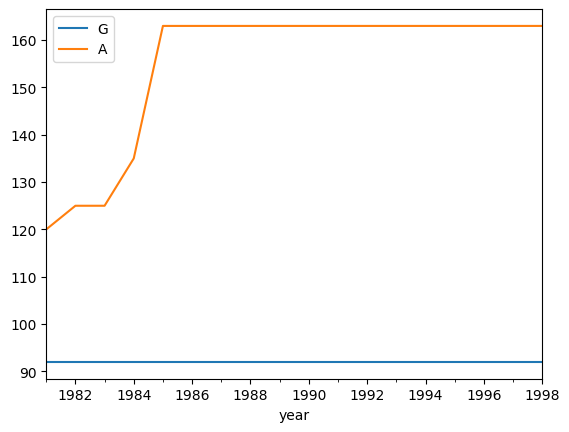

In [51]:
sums.cummax().plot()

<Axes: xlabel='year'>

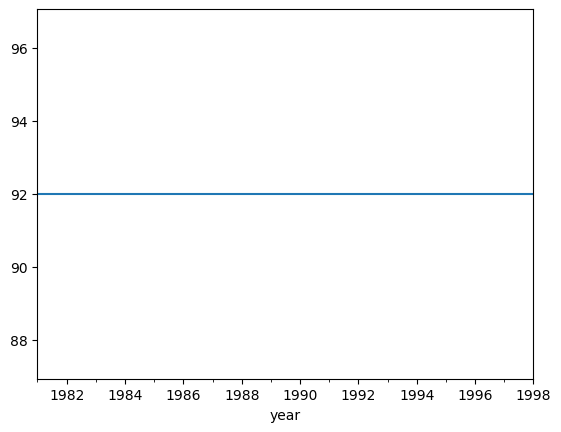

In [54]:
sums["G"].expanding().max().plot()

In [55]:
total = sums.sum()
# sums.['G'].expanding()

In [56]:
total

G     788.0
A    1768.0
dtype: float64

<Axes: xlabel='year'>

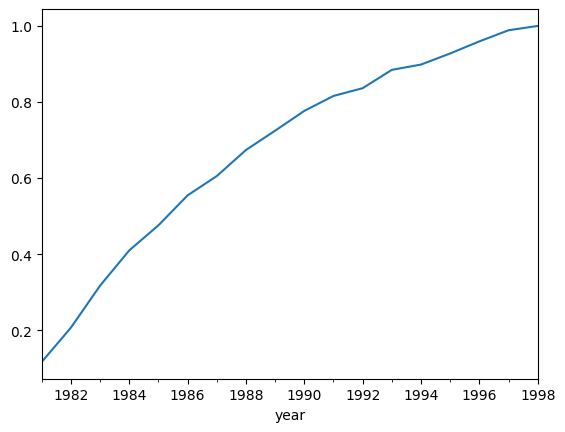

In [62]:
sums["G"].expanding().aggregate(lambda x: x.sum() / total["G"]).plot() # jaka to część wszystkich goli

In [58]:
sums["G"].expanding().agg(["sum", "mean"])

,sum,mean
year,,
1981-01-01,92.0,92.000000
1982-01-01,163.0,81.500000
1983-01-01,250.0,83.333333
1984-01-01,323.0,80.750000
1985-01-01,375.0,75.000000
1986-01-01,437.0,72.833333
1987-01-01,477.0,68.142857
1988-01-01,531.0,66.375000
1989-01-01,571.0,63.444444


In [63]:
pd.Series([10, 20, 60, 100]).expanding().sum()

0     10.0
1     30.0
2     90.0
3    190.0
dtype: float64

In [64]:
pd.Series([10, 20, 60, 100]).cumsum() # to samo co expanding().sum()

0     10
1     30
2     90
3    190
dtype: int64